# First Order System
현재 시간의 상태가 이전 시간의 상태와 관련이 있다고 가정    

## 이전 시간의 상태만 입력으로 
> Autonomous System이라고도 하며, 외부 입력 없이 자기 혼자서 돌아가는 특징이 있습니다.

수식은 아래와 같다.
$$
x_t = f(x_{t-1})
$$
- $x$ : 상태 
- $t$ : 시간 
- $x_t$: t시간일 때의 상태  
- $x_{t-1}$: t-1시간(이전 시간)일 때의 상태 

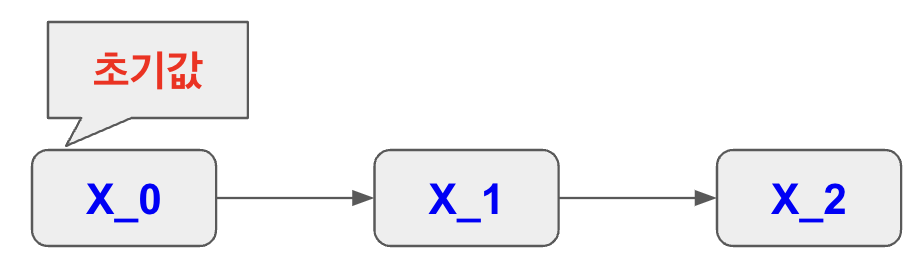

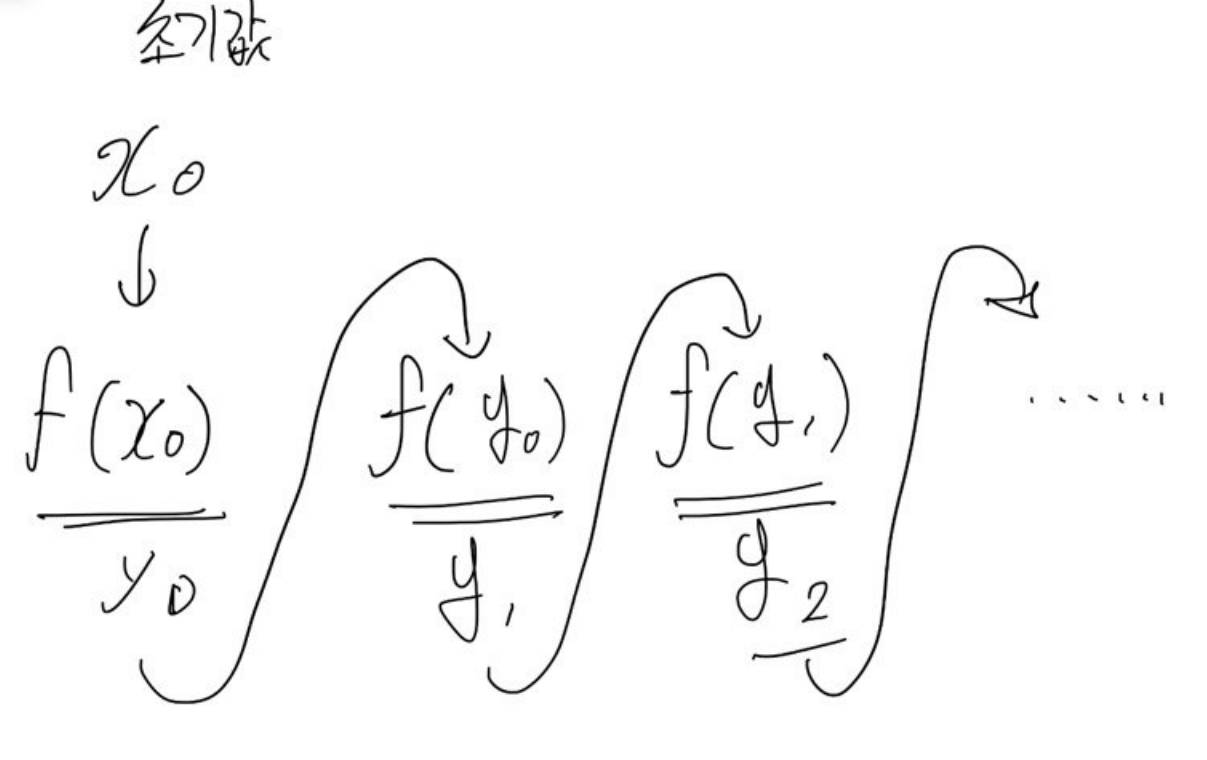

$\Large x_0 = 초기값$<br/>
$\Large y_n = Output$<br/>
$\Large I_n = Input$<br/>

$\Large x_0 \to f(x_0) = y_o $<br/>
&emsp; &emsp; &emsp; $\Large \downarrow $<br/>

$\Large I_1 \to f(y_0, I_1) = y_1 $<br/>
&emsp; &emsp; &emsp; $\Large \downarrow $<br/>

$\Large I_2 \to f(y_1, I_2) = y_2 $<br/>
&emsp; &emsp; &emsp; $\Large \downarrow $<br/>

&emsp; &emsp; &emsp; $\Large...$<br/>
&emsp; &emsp; &emsp; $\Large \downarrow $<br/>

$\Large I_n \to f(y_{n-1}, I_n) = y_n $<br/>
&emsp; &emsp; &emsp; $\Large \downarrow $<br/>

&emsp; &emsp; &emsp; $\Large...$<br/>

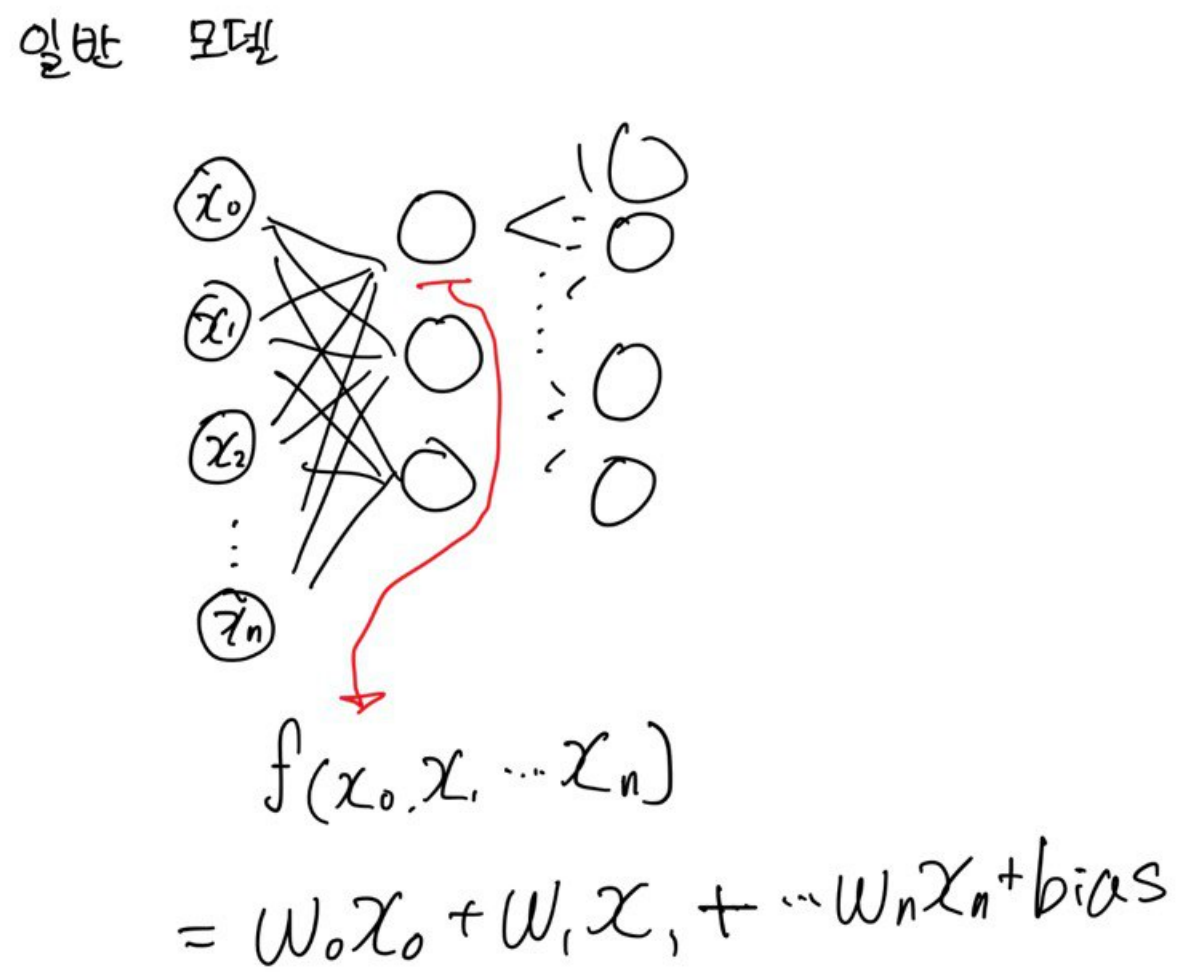

$ \Large
f(x_0, x_1, ... x_n) = w_0x_1 + w_1x_1 + ... + w_nx_n + bias
$

## 이전 시간의 상태와 현재 값을 입력으로 
수식은 아래와 같다.
$$
x_t = f(x_{t-1},u_t)
$$
- $x$ : 상태 
- $t$ : 시간 
- $u_t$: t시간일 때의 현재(입력) 값
- $x_t$: t시간일 때의 상태  
- $x_{t-1}$: t-1시간(이전 시간)일 때의 상태 

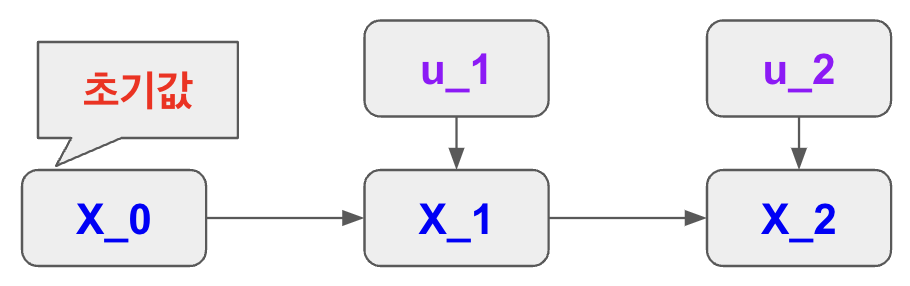

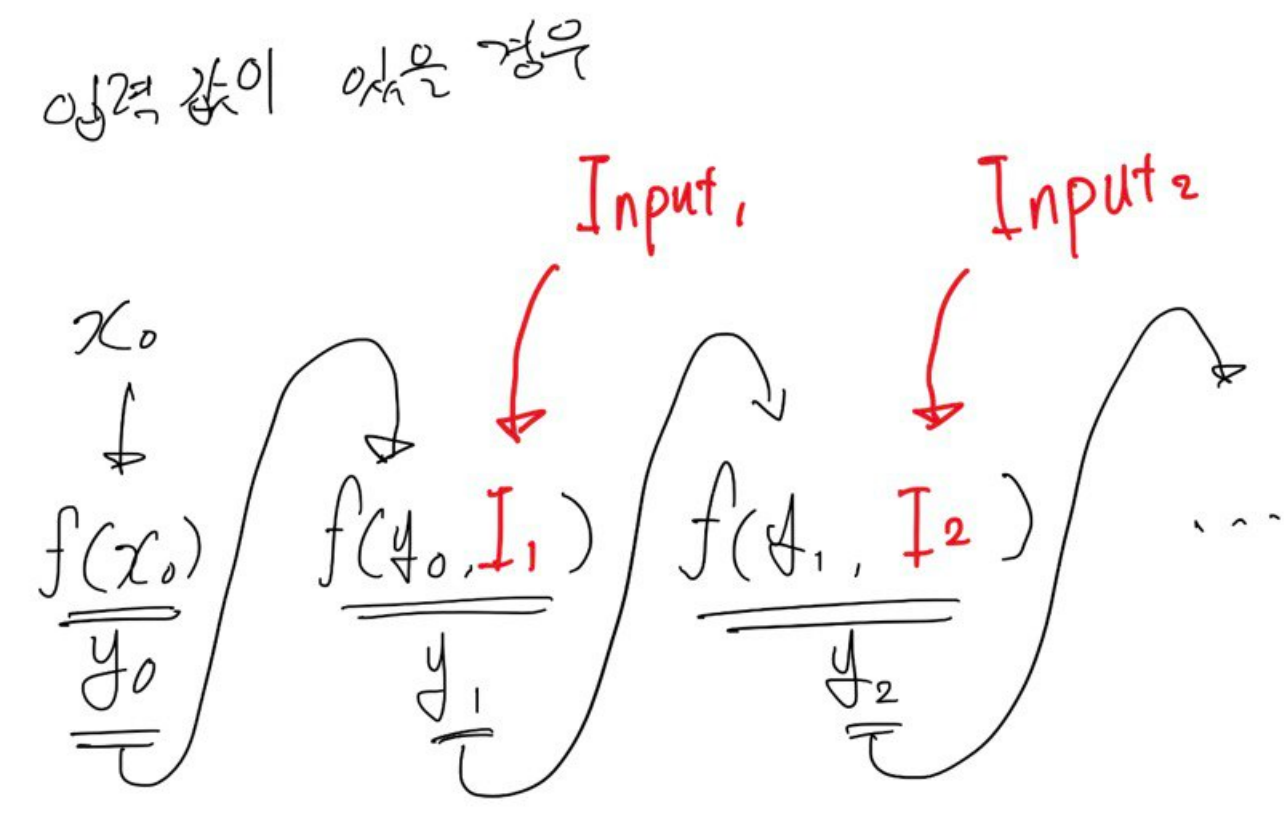

$\Large x_0 = 초기값$<br/>
$\Large y_n = Output$<br/>
$\Large I_n = Input$<br/>

$\Large x_0 \to f(x_0) = y_o $<br/>
&emsp; &emsp; &emsp; $\Large \downarrow $<br/>

$\Large I_1 \to f(y_0, I_1) = y_1 $<br/>
&emsp; &emsp; &emsp; $\Large \downarrow $<br/>

$\Large I_2 \to f(y_1, I_2) = y_2 $<br/>
&emsp; &emsp; &emsp; $\Large \downarrow $<br/>

&emsp; &emsp; &emsp; $\Large...$<br/>
&emsp; &emsp; &emsp; $\Large \downarrow $<br/>

$\Large I_n \to f(y_{n-1}, I_n) = y_n $<br/>
&emsp; &emsp; &emsp; $\Large \downarrow $<br/>

&emsp; &emsp; &emsp; $\Large...$<br/>

- 이때 </br>
$ \Large
y_n = f(y_{n-1}, I_n) = ActivateFunc(w_0y_{n-1} + w_1I_n + bias)
$</br>
- 여기에 사용되는 활성함수로는 $tanh()$ 등이 있다

#### RNN
- 이전 결과값들의 데이터도 인풋으로 들어감
    - 순서대로 처리(학습) 가능
    - 즉 시계열 데이터를 순서대로 학습이 가능함

# State-Space Model 
- 1차원 시스템의 모형(First Order System):     
$$
x_t = f(x_{t-1}, u_t)
$$
- 각 시간에서 관측 가능한 상태($x_t$)의 모음: 출력 $y_t$
$$
y_t = h(x_t)
$$

- $x$ : 상태(hidden layer의 state) 
- $t$ : 시간 
- $u_t$: t시간일 때의 현재(입력) 값
- $x_t$: t시간일 때의 상태  
- $x_{t-1}$: t-1시간(이전 시간)일 때의 상태 
- $y_t$: t시간일 때의 출력 값 

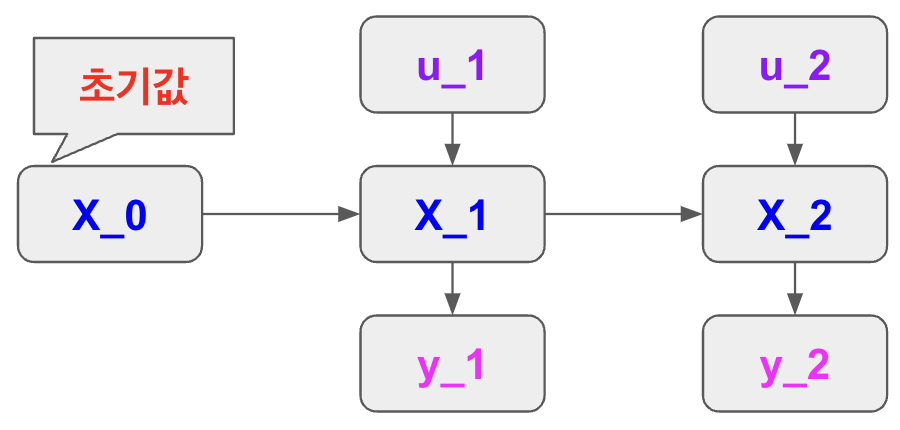

# [RNN(Recurrent Neural Networks)](https://ko.wikipedia.org/wiki/%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D)
- RNN이란 Recurrent Neural Networks의 약자로, 순환 신경망을 뜻합니다. 순환 신경망이라는 이름은 입력받는 신호의 길이가 한정되지 않은 동적 데이터를 처리한다는 점에서 붙여진 이름입니다.    

CNN vs RNN 
- CNN은 이미지 구역별로 같은 weight를 공유한다.
- RNN은 시간별 같은 weight를 공유한다. 

## RNN 특징 
- $h_t$는 t일 때의 hidden layer 상태를 나타낸다. 
- $h_t$는 이전까지의 상태($h_{0}, h_{t-1}$)와 이전까지의 입력($x_{t-1}, x_t$)을 대표할 수 있는 압축본이라고 할 수 있습니다.

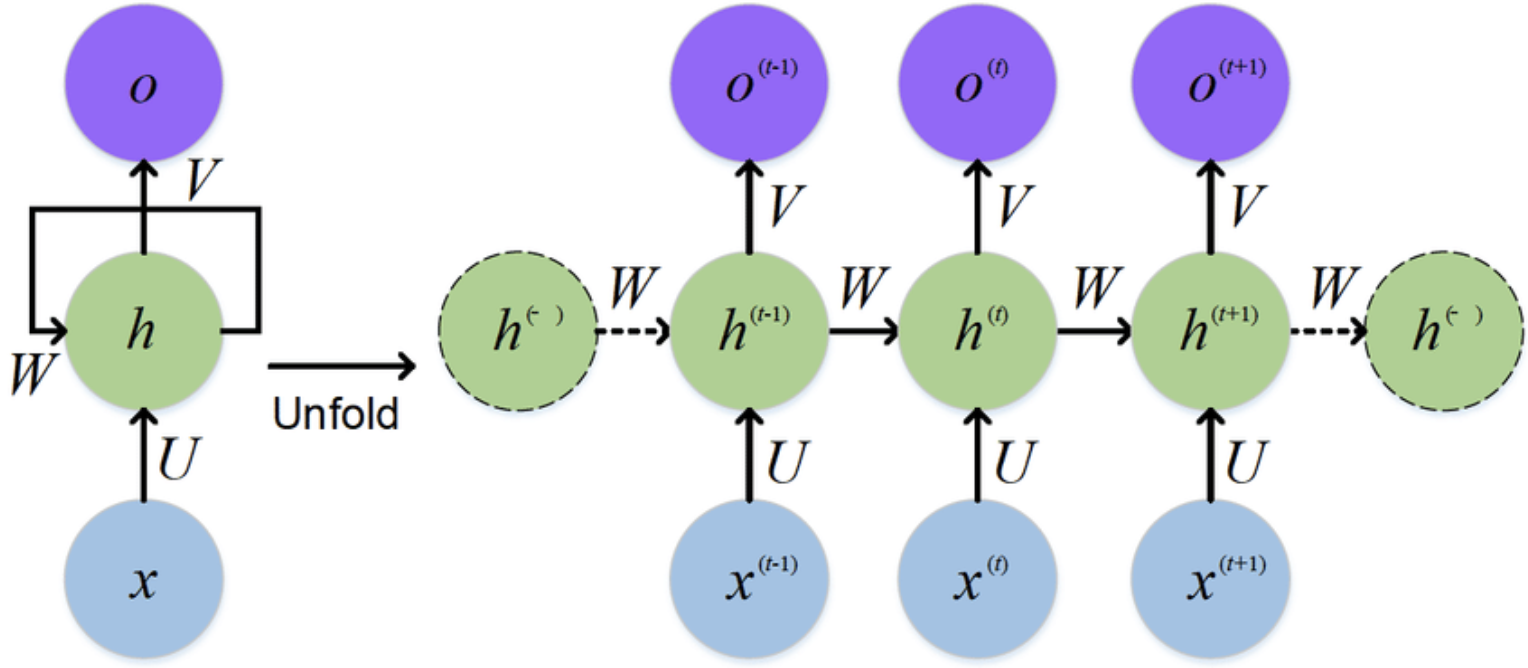

### $y_n = f(y_{n-1}, U_n)$
### &emsp; $= f(f(y_{n-2}, U_{n-1}), U_n)$
### &emsp; &emsp; $...$

- 이므로 이전의 데이터들의 대한 값(이전 아웃풋)을 인풋으로 가짐
    - 아웃풋 $O_n$에는 이전 인풋들과 예측값들이 영향을 끼침

## RNN 구조 종류 

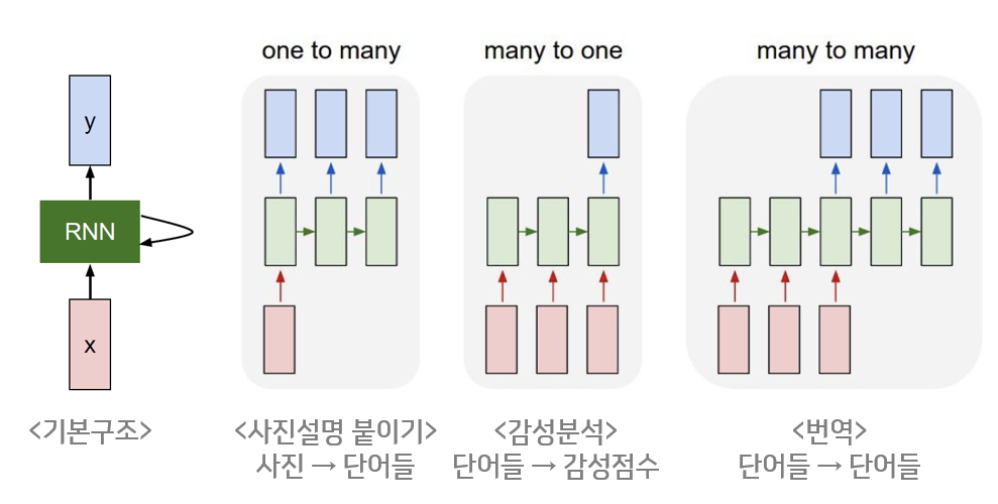

#### 언어 모델의 경우 마지막 모델이 많이 사용됨 -> 한국어는 끝까지 들어봐라?

## [RNN 연산](https://wikidocs.net/22886)

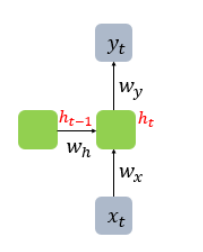

- 현재 시점 t에서의 은닉 상태값을 $h_t$라고 정의하겠습니다. 은닉층의 메모리 셀은  $h_t$를 계산하기 위해서 총 두 개의 가중치를 가집니다. 
- 하나는 입력층을 위한 가중치 $W_x$이고, 하나는 이전 시점 t-1의 은닉 상태값인 $h_{t-1}$을 위한 가중치 $W_h$입니다.

이를 식으로 표현하면 다음과 같습니다. 
- 은닉층: $h_t = tanh(W_x x_t + W_h h_{t-1} + b)$ 
  - 일반 레이어같은 회귀모델 + tanh(sigmoid같은 활성함수)
- 출력층: $y_t = f(W_y h_t +b)$
  - f()는 activate function

$\Large x_0 = 초기값$<br/>
$\Large y_n = Output$<br/>
$\Large I_n = Input$<br/>

$\Large x_0 \to f(x_0) = y_o $<br/>
&emsp; &emsp; &emsp; $\Large \downarrow $<br/>

$\Large I_1 \to f(y_0, I_1) = y_1 $<br/>
&emsp; &emsp; &emsp; $\Large \downarrow $<br/>

$\Large I_2 \to f(y_1, I_2) = y_2 $<br/>
&emsp; &emsp; &emsp; $\Large \downarrow $<br/>

&emsp; &emsp; &emsp; $\Large...$<br/>
&emsp; &emsp; &emsp; $\Large \downarrow $<br/>

$\Large I_n \to f(y_{n-1}, I_n) = y_n $<br/>
&emsp; &emsp; &emsp; $\Large \downarrow $<br/>

&emsp; &emsp; &emsp; $\Large...$<br/>

$ w_n = 가중치 $ </br>
$ y_{n-1} = 이전 아웃풋 $ </br>
$ I_n = 인풋 $ </br>
$ y_n = 아웃풋 $ </br>

- 이때 </br>
$ \Large
y_n = f(y_{n-1}, I_n) = ActivateFunc(w_0y_{n-1} + w_1I_n + bias)
$</br>
- 여기에 사용되는 활성함수로는 $tanh()$ 등이 있다

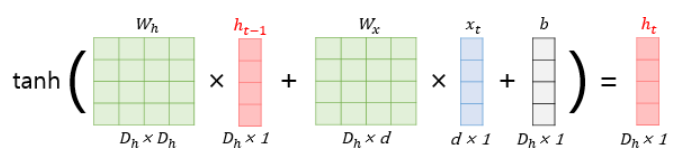

# [TextRNN](https://colab.research.google.com/github/graykode/nlp-tutorial/blob/master/3-1.TextRNN/TextRNN.ipynb)

## Data

### 데이터 생성 

In [1]:
sentences = ["i like dog", "i love coffee", "i hate milk"]
sentences

['i like dog', 'i love coffee', 'i hate milk']

### 데이터 토큰화 

In [2]:
word_list = " ".join(sentences).split()
word_list

['i', 'like', 'dog', 'i', 'love', 'coffee', 'i', 'hate', 'milk']

In [3]:
# 중복 제거 (집합set 이용) -> 사전에는 중복된 단어가 없어야 함
# word_list = ['<pad>', '<unk>'] + list(set(word_list))
word_list = list(set(word_list))
word_list

['dog', 'milk', 'hate', 'coffee', 'like', 'i', 'love']

### 데이터 사전

In [4]:
word_dict = {w: i for i, w in enumerate(word_list)}
word_dict

{'dog': 0, 'milk': 1, 'hate': 2, 'coffee': 3, 'like': 4, 'i': 5, 'love': 6}

In [5]:
number_dict = {i: w for i, w in enumerate(word_list)}
number_dict

{0: 'dog', 1: 'milk', 2: 'hate', 3: 'coffee', 4: 'like', 5: 'i', 6: 'love'}

In [6]:
n_class = len(word_dict)    # vocab list의 길이
batch_size = len(sentences) # 문장의 개수
n_class, batch_size

(7, 3)

In [7]:
import numpy as np

def sentence_to_number(sentence, word_dict):
    # 문장을 단어 단위로 분리
    words = sentence.split()
    # 문장의 단어 개수만큼 0으로 채워진 벡터 생성
    word_vector = np.zeros(len(words), dtype=np.int32)
    # 각 단어에 대해 인덱스를 추출하여 벡터에 저장
    for i in range(len(words)):
        word_vector[i] = word_dict[words[i]]
    # 문장 벡터 반환
    return word_vector

# 원핫 벡터 생성
def get_ohe_vector(sentence, number_dict):
    n_class = len(number_dict)
    # ohe된 벡터를 저장할 리스트
    ohe_sentence = []
    # 각 단어에 대해 ohe 벡터 생성
    for word_v in sentence:
        # 단어의 개수만큼 0으로 채워진 벡터 생
        ohe_vector = np.zeros(n_class, dtype=np.int8)
        # 단어의 인덱스에 1을 넣어줌
        ohe_vector[word_v] = 1
        # ohe 벡터를 리스트에 추가
        ohe_sentence.append(ohe_vector)
    # 리스트를 array로 변환 후 반환
    return np.array(ohe_sentence)

def get_ohe_vecters(sentences, number_dict):
    # 문장의 개수만큼 ohe 벡터를 저장할 리스트 생성
    ohe_sentences = []
    # 각 문장에 대해 ohe 벡터 생성
    for sentence  in sentences:
        # 문장을 ohe 벡터로 변환
        ohe_sentence = get_ohe_vector(sentence , number_dict)
        # ohe 벡터를 리스트에 추가
        ohe_sentences.append(ohe_sentence)
    # 리스트를 array로 변환 후 반환
    return np.array(ohe_sentences)

def ohe_vector_to_word(ohe_vector, number_dict):
    # ohe 벡터에서 1이 있는 인덱스를 추출
    index = np.argmax(ohe_vector)
    # 인덱스에 해당하는 단어를 반환
    return number_dict[index]

### 검증

In [114]:
sentences = ["i like dog", "i love coffee", "i hate milk"]
sentences_vectors = [sentence_to_number(sentence, word_dict) for sentence in sentences]
sentences_vectors

[array([ 0, 10,  8], dtype=int32),
 array([0, 9, 7], dtype=int32),
 array([0, 1, 3], dtype=int32)]

In [115]:
ohe_sentence = get_ohe_vector(sentences_vectors[0], number_dict)
words = [ohe_vector_to_word(ohe_vector, number_dict) for ohe_vector in ohe_sentence]
ohe_sentence, words, sentences[0]

(array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]], dtype=int8),
 ['i', 'like', 'dog'],
 'i like dog')

In [116]:
get_ohe_vecters(sentences_vectors, number_dict)

array([[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]],

       [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]],

       [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]]], dtype=int8)

In [11]:
import numpy as np

def get_ohe_vector_from_dict(word_dict):
    # 정방행령 대각행렬 생성
    vacab_size = len(word_dict)
    ohe_vector = np.eye(vacab_size, dtype=np.int8)
    return ohe_vector

def tokenizer(sentence, word_dict):
    # 문장을 단어 단위로 분리
    words = sentence.split()
    # 문장의 단어 개수만큼 0으로 채워진 벡터 생성
    word_vector = np.zeros(len(words), dtype=np.int32)
    # 각 단어에 대해 인덱스를 추출하여 벡터에 저장
    for i in range(len(words)):
        word_vector[i] = word_dict[words[i]]
    # 문장 벡터 반환
    return word_vector

def get_word_dict(sentences):
    word_list = list(set(" ".join(sentences).split()))
    word_dict = {w: i for i, w in enumerate(word_list)}
    number_dict = {i: w for i, w in enumerate(word_list)}
    
class WordDict():
    def __init__(self, sentences):
        word_list = list(set(" ".join(sentences).split()))
        self.word_dict = {w: i for i, w in enumerate(word_list)}
        self.number_dict = {i: w for i, w in enumerate(word_list)}
        
    def __len__(self):
        return len(self.word_dict)
    
    def __getitem__(self, idx):
        if type(idx) == type(''):
            return self.word_dict[idx]
        elif type(idx) == type(0):
            return self.number_dict[idx]

In [10]:
type('a'), type(1), type(str())

(str, int, str)

In [118]:
ohe_vector = get_ohe_vector_from_dict(word_dict)
ohe_vector

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int8)

In [119]:
n_sentence = tokenizer(sentences[0], word_dict)
ohe_sentence = ohe_vector[n_sentence]  # ohe_vec에서 n_sentence에 해당하는 행을 추출
sentences[0], n_sentence, ohe_sentence

('i like dog',
 array([ 0, 10,  8], dtype=int32),
 array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]], dtype=int8))

In [124]:
n_sentences = [tokenizer(sentence, word_dict) for sentence in sentences]
ohe_sentences = ohe_vector[n_sentences] # ohe_vec에서 n_sentences에 해당하는 행을 추출
                                        # 다차원 행렬이지만 슬라이싱 가능
sentences, n_sentences, ohe_sentences

(['i like dog', 'i love coffee', 'i hate milk'],
 [array([ 0, 10,  8], dtype=int32),
  array([0, 9, 7], dtype=int32),
  array([0, 1, 3], dtype=int32)],
 array([[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]],
 
        [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]],
 
        [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]]], dtype=int8))

In [77]:
import numpy as np

class WordDict():
    def __init__(self, sentences):
        word_list = list(set(" ".join(sentences).split()))
        self.word_dict = {w: i for i, w in enumerate(word_list)}
        self.number_dict = {i: w for i, w in enumerate(word_list)}
        
    def __len__(self):
        return len(self.word_dict)
    
    def __getitem__(self, idx):
        if type(idx) == type(''):
            return self.word_dict[idx]
        elif type(idx) == type(0) or type(idx) == type(np.int32(0)):
            return self.number_dict[idx]

In [78]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torch import tensor

class LoveLikeHateDataset(Dataset):
    def __init__(self, sentences, word_dict):
        super().__init__()
        self.word_dict = word_dict
        self.ohe_vector = self.get_ohe_vector_from_dict(self.word_dict)
        self.n_sentences = [self.tokenizer(sentence) for sentence in sentences]
        self.ohe_sentences = self.ohe_vector[self.n_sentences]
    
    def __len__(self):
        return len(self.ohe_sentences)
    
    def __getitem__(self, idx):
        feature = self.ohe_sentences[idx][:-1]
        target = self.n_sentences[idx][-1]
        return feature, target
    
    def get_ohe_vector_from_dict(self, word_dict):
        # 정방행령 대각행렬 생성
        return np.eye(len(word_dict), dtype=np.int8)

    def tokenizer(self, sentence):
        # 문장을 단어 단위로 분리
        words = sentence.split()
        # 문장의 단어 개수만큼 0으로 채워진 벡터 생성
        word_vector = np.zeros(len(words), dtype=np.int32)
        # 각 단어에 대해 인덱스를 추출하여 벡터에 저장
        for i in range(len(words)):
            word_vector[i] = self.word_dict[words[i]]
        # 문장 벡터 반환
        return word_vector

In [79]:
sentences = ["i like dog", "i love coffee", "i hate milk"]
word_dict = WordDict(sentences)
len(word_dict), word_dict['dog'], word_dict[1]

(7, 0, 'milk')

In [80]:
llh_dataset = LoveLikeHateDataset(sentences, word_dict)
len(llh_dataset), llh_dataset[0][0], llh_dataset[0][1]

(3,
 array([[0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0]], dtype=int8),
 0)

In [81]:
word_dict[llh_dataset[0][1]]

'dog'

In [121]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

## Dataset

### 디버깅 

In [8]:
sen = sentences[0]
sen

'i like dog'

In [9]:
word = sen.split() # 토큰화 
word

['i', 'like', 'dog']

In [10]:
word[:-1]

['i', 'like']

In [11]:
input = [word_dict[n] for n in word[:-1]] # 인베딩 (문자 -> 숫자)
input 

[6, 4]

In [12]:
[number_dict[n] for n in input] # 숫자 -> 문자 

['i', 'like']

In [13]:
target = word_dict[word[-1]]
target, number_dict[target]

(0, 'dog')

In [14]:
n_class

7

In [15]:
np.eye(n_class)

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [16]:
np.eye(n_class)[input] # 원핫인코딩 

array([[0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.]])

### Dataset 생성

In [17]:
def make_batch():
    input_batch = []
    target_batch = []

    for sen in sentences:
        word = sen.split()  # space tokenizer
        input = [word_dict[n] for n in word[:-1]]  # create (1~n-1) as input
        target = word_dict[word[-1]]  # create (n) as target, We usually call this 'casual language model'

        input_batch.append(np.eye(n_class)[input]) # 원핫인코딩
        target_batch.append(target)

    return input_batch, target_batch

In [18]:
input_batch, target_batch = make_batch()
np.array(input_batch).shape # [batch_size, n_step, n_class] 

(3, 2, 7)

## RNN Model 

In [19]:
n_hidden = 5 # number of hidden units in one cell

### 디버깅 

In [20]:
rnn = nn.RNN(input_size=n_class, hidden_size=n_hidden)

In [21]:
input_batch = torch.FloatTensor(input_batch)
input_batch.shape

<ipython-input-21-c46ec3f236b6>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  input_batch = torch.FloatTensor(input_batch)


torch.Size([3, 2, 7])

In [22]:
input_batch_transpose = input_batch.transpose(0, 1) 
input_batch_transpose.shape # (input_size, batch_size, emdding_size)

torch.Size([2, 3, 7])

In [23]:
hidden = torch.zeros(1, batch_size, n_hidden) # hidden 초기값
hidden.shape

torch.Size([1, 3, 5])

In [24]:
outputs, hidden = rnn(input_batch_transpose, hidden)
outputs.shape, hidden.shape 

(torch.Size([2, 3, 5]), torch.Size([1, 3, 5]))

In [25]:
outputs = outputs[-1]
outputs.shape

torch.Size([3, 5])

In [26]:
linear = nn.Linear(n_hidden, n_class, bias=False)

In [27]:
pred = linear(outputs)
pred.shape 

torch.Size([3, 7])

### RNN 모델 생성 

In [28]:
class TextRNN(nn.Module):
    def __init__(self):
        super(TextRNN, self).__init__()
        self.rnn = nn.RNN(input_size=n_class, hidden_size=n_hidden)
        self.linear = nn.Linear(n_hidden, n_class, bias=False)

    def forward(self, hidden, X):
        X = X.transpose(0, 1) 
        outputs, hidden = self.rnn(X, hidden)
        outputs = outputs[-1] 
        pred = self.linear(outputs) 
        return pred

## Training

In [29]:
model = TextRNN()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

input_batch, target_batch = make_batch()
input_batch = torch.FloatTensor(input_batch)
target_batch = torch.LongTensor(target_batch)

# Training
for epoch in range(5000):
    
    # hidden : [num_layers * num_directions, batch, hidden_size]
    hidden = torch.zeros(1, batch_size, n_hidden)
    # input_batch : [batch_size, n_step, n_class]
    output = model(hidden, input_batch)

    # output : [batch_size, n_class], target_batch : [batch_size] (LongTensor, not one-hot)
    loss = criterion(output, target_batch)
    if (epoch + 1) % 1000 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 1000 cost = 0.226019
Epoch: 2000 cost = 0.027525
Epoch: 3000 cost = 0.010061
Epoch: 4000 cost = 0.004957
Epoch: 5000 cost = 0.002715


## Predict

In [30]:
hidden = torch.zeros(1, batch_size, n_hidden)
hidden.shape 

torch.Size([1, 3, 5])

In [31]:
pred = model(hidden, input_batch)
pred.shape 

torch.Size([3, 7])

In [32]:
pred_soft = pred.softmax(dim=1)
pred_soft.shape 

torch.Size([3, 7])

In [33]:
pred_max = pred_soft.argmax(dim=1)
pred_max.shape 

torch.Size([3])

In [34]:
input = [sen.split()[:2] for sen in sentences]

print([sen.split()[:2] for sen in sentences], '->', [number_dict[n.item()] for n in pred_max])

[['i', 'like'], ['i', 'love'], ['i', 'hate']] -> ['dog', 'coffee', 'milk']


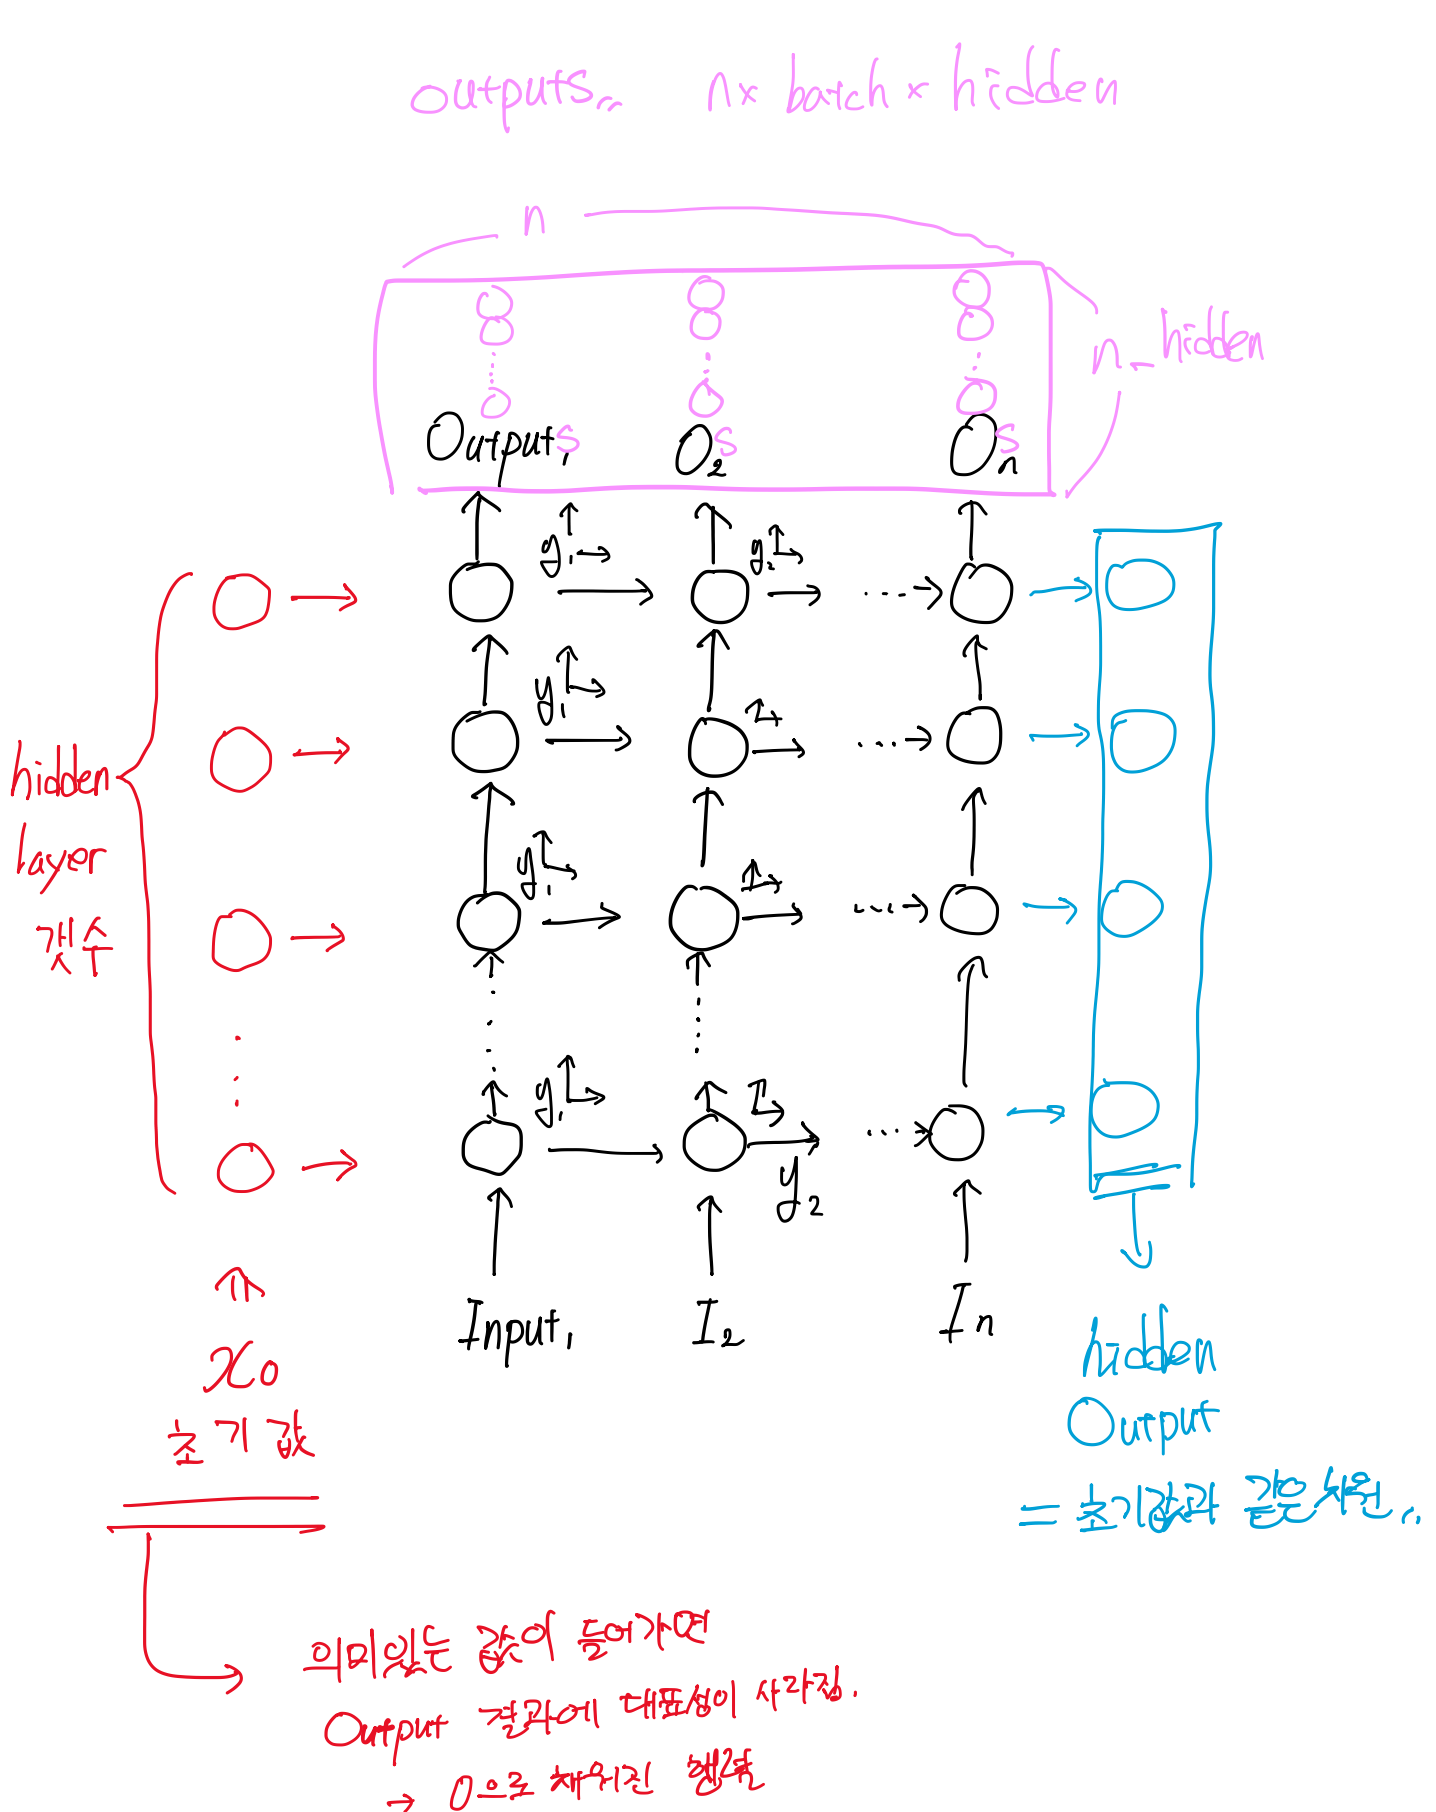

### 직접 해보기

In [1]:
import numpy as np

class WordDict():
    # 문장들을 받아서 단어 사전을 생성
    def __init__(self, sentences):
        # 문장들을 단어 단위로 분리, 중복 제거
        word_list = list(set(" ".join(sentences).split()))
        # word2index 사전 생성
        self.word_dict = {w: i for i, w in enumerate(word_list)}
        # index2token 사전 생성
        self.number_dict = {i: w for i, w in enumerate(word_list)}
        
    def __len__(self):
        # 단어 사전의 길이 반환
        return len(self.word_dict)
    
    def __getitem__(self, idx):
        # idx값이 문자열이면 word2index 사전에서 인덱스를 추출하여 반환
        if type(idx) == type(str()) or type(idx) == type(np.str_()):
            return self.word_dict.get(idx, '<unk word>')
        # idx값이 숫자면 index2token 사전에서 토큰을 추출하여 반환
        else:
            return self.number_dict.get(idx, '<unk token>')

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torch import tensor

class LoveLikeHateDataset(Dataset):
    ############################################################
    # 외부에서 호출하는 함수 (필수적으로 구현해야 함)
    ############################################################
    def __init__(self, sentences, word_dict):
        super().__init__()
        self.word_dict = word_dict
        # word_dict를 이용하여 ohe_vector 생성
        self.ohe_vector = self.__get_ohe_vector_from_dict(self.word_dict)   
        # 문장을 토큰화
        self.tokened_sentences = [self.__tokenizer(sentence) for sentence in sentences]
        # 토큰화된 문장을 ohe_vector를 이용하여 ohe_vector로 변환 -> 슬라이싱을 통해 쉽게 추출 가능
        self.ohe_sentences = self.ohe_vector[self.tokened_sentences]
    
    def __len__(self):
        return self.ohe_sentences.shape[0] # == len(self.ohe_sentences)
    
    def __getitem__(self, idx):
        # ohe 인코딩된 벡터의 마지막 단어를 제외한 벡터를 feature로 사용
        feature = tensor(self.ohe_sentences[idx][:-1], dtype=torch.float32)
        # 토큰화된 벡터의 마지막 단어를 target으로 사용
        target = tensor(self.tokened_sentences[idx][-1], dtype=torch.float32).reshape(1)
        return feature, target
    
    ############################################################
    # 내장한 함수 (__를 붙이면 private)
    ############################################################
    def __get_ohe_vector_from_dict(self, word_dict):
        # 정방행령 대각행렬 생성
        return np.eye(len(word_dict), dtype=np.int8)
    
    def __tokenizer(self, sentence):
        # 문장을 단어 단위로 분리
        words = sentence.split()
        # 문장의 단어 개수만큼 0으로 채워진 벡터 생성
        word_vector = np.zeros(len(words), dtype=np.int32)
        # 각 단어에 대해 인덱스를 추출하여 벡터에 저장
        for i in range(len(words)):
            word_vector[i] = self.word_dict[words[i]]
        # 문장 벡터 반환
        return word_vector

In [3]:
sentences = ["i like dog", "i love coffee", "i hate milk"]
word_dict = WordDict(sentences)
llh_dataset = LoveLikeHateDataset(sentences, word_dict)
len(llh_dataset), llh_dataset[0][0], llh_dataset[0][1]

(3,
 tensor([[0., 0., 0., 0., 0., 1., 0.],
         [0., 0., 1., 0., 0., 0., 0.]]),
 tensor([3.]))

### RNN

In [4]:
# n_hidden = 5 # 한 셀의 은닉 유닛 수
N_HIDDEN = 5
# 배치 사이즈
BATCH_SIZE = len(llh_dataset)
# 임베딩 벡터의 차원 수
EMBEDDING_SIZE = len(word_dict)

In [5]:
# 데이터 로더 생성
from torch.utils.data import DataLoader

llh_dataloader = DataLoader(llh_dataset, batch_size=3)
# len(llh_dataloader), next(iter(llh_dataloader))[0].shape, next(iter(llh_dataloader))[1]
# 1, torch.Size([3, 2, 7]), tensor([[1], [3], [0]], dtype=torch.int32))

input_batch = next(iter(llh_dataloader))

input_batch_transpose = input_batch[0].transpose(0, 1)
# input_batch_transpose.shape
# torch.Size([2, 3, 7])
# RNN의 경우 (input_size, batch_size, embedding_size)로 입력을 받음
init_hidden = torch.zeros(1, BATCH_SIZE, N_HIDDEN)
init_hidden.shape, input_batch_transpose.shape

(torch.Size([1, 3, 5]), torch.Size([2, 3, 7]))

In [35]:
vacab_size = len(word_dict)
# 아주 간단한 RNN 모델이기 때문에 레이어를 하나만 사용
rnn_layer = nn.RNN(input_size=vacab_size,   # 입력의 크기
                    hidden_size=N_HIDDEN,       # 은닉층의 크기
                    )

print(vacab_size)

7


In [36]:
# 아웃풋과 히든이 반환됨 -> 히든은 사용x
# 아웃풋은 (input_size, batch_size, embedding_size)로 반환됨
outputs, hidden = rnn_layer(input_batch_transpose, init_hidden)
outputs.shape, hidden.shape

(torch.Size([2, 3, 5]), torch.Size([1, 3, 5]))

In [38]:
outputs, outputs.shape

(tensor([[[ 0.0919,  0.3388, -0.1929, -0.0142, -0.1486],
          [ 0.0919,  0.3388, -0.1929, -0.0142, -0.1486],
          [ 0.0919,  0.3388, -0.1929, -0.0142, -0.1486]],
 
         [[ 0.3811,  0.3209, -0.4144, -0.4976, -0.1284],
          [ 0.0995,  0.4207, -0.1150, -0.1880, -0.2375],
          [ 0.4751,  0.6927, -0.0895, -0.4827, -0.4627]]],
        grad_fn=<StackBackward0>),
 torch.Size([2, 3, 5]))

In [39]:
# outputs[-1]을 사용하는 이유 : 마지막 인풋까지 영향을 끼친 값은 마지막 아웃풋에 반영되기 때문
outputs_ = outputs[-1]
outputs_, outputs_.shape

(tensor([[ 0.3811,  0.3209, -0.4144, -0.4976, -0.1284],
         [ 0.0995,  0.4207, -0.1150, -0.1880, -0.2375],
         [ 0.4751,  0.6927, -0.0895, -0.4827, -0.4627]],
        grad_fn=<SelectBackward0>),
 torch.Size([3, 5]))

In [70]:
# 마지막 아웃풀은 hidden 갯수이기 때문에
# Linear 레이어를 통해 vocab사이즈로 변환해줌
linear_layer = nn.Linear(N_HIDDEN, vacab_size, bias=False)
pred = linear_layer(outputs_)
pred, pred.shape 

(tensor([[ 0.1239, -0.1435, -0.1362, -0.0368, -0.0016,  0.0271,  0.0832],
         [-0.0970, -0.1488, -0.0711,  0.1472, -0.1122, -0.0211,  0.0732],
         [-0.0821, -0.4030, -0.2021,  0.2146, -0.1233,  0.1539,  0.0698]],
        grad_fn=<MmBackward0>),
 torch.Size([3, 7]))

In [71]:
# 각 값을 softmax를 통해 확률로 변환
softmax_layer = nn.Softmax(dim=1)
pred_soft = softmax_layer(pred)
pred_soft, pred_soft.shape

(tensor([[0.1629, 0.1247, 0.1256, 0.1387, 0.1437, 0.1479, 0.1564],
         [0.1333, 0.1266, 0.1368, 0.1702, 0.1313, 0.1438, 0.1580],
         [0.1361, 0.0987, 0.1207, 0.1831, 0.1306, 0.1723, 0.1584]],
        grad_fn=<SoftmaxBackward0>),
 torch.Size([3, 7]))

In [72]:
# 최고 확률을 가진 단어의 인덱스를 추출
pred_max = pred_soft.argmax(dim=1)
pred_max, pred_max.shape

(tensor([0, 3, 3]), torch.Size([3]))

In [56]:
# 어떤 단어가 가장 확률이 높은지 확인
for idx in pred_max:
    print(word_dict[idx.item()])

love
i
i


In [57]:
sentences

['i like dog', 'i love coffee', 'i hate milk']

### 모델정의, 학습

In [ ]:
import numpy as np

class WordDict():
    # 문장들을 받아서 단어 사전을 생성
    def __init__(self, sentences):
        # 문장들을 단어 단위로 분리, 중복 제거
        word_list = list(set(" ".join(sentences).split()))
        # word2index 사전 생성
        self.word_dict = {w: i for i, w in enumerate(word_list)}
        # index2token 사전 생성
        self.number_dict = {i: w for i, w in enumerate(word_list)}
        
    def __len__(self):
        # 단어 사전의 길이 반환
        return len(self.word_dict)
    
    def __getitem__(self, idx):
        # idx값이 문자열이면 word2index 사전에서 인덱스를 추출하여 반환
        if type(idx) == type(str()) or type(idx) == type(np.str_()):
            return self.word_dict.get(idx, '<unk word>')
        # idx값이 숫자면 index2token 사전에서 토큰을 추출하여 반환
        else:
            return self.number_dict.get(idx, '<unk token>')

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torch import tensor

class LoveLikeHateDataset(Dataset):
    ############################################################
    # 외부에서 호출하는 함수 (필수적으로 구현해야 함)
    ############################################################
    def __init__(self, sentences, word_dict):
        super().__init__()
        self.word_dict = word_dict
        # word_dict를 이용하여 ohe_vector 생성
        self.ohe_vector = self.__get_ohe_vector_from_dict(self.word_dict)   
        # 문장을 토큰화
        self.tokened_sentences = [self.__tokenizer(sentence) for sentence in sentences]
        # 토큰화된 문장을 ohe_vector를 이용하여 ohe_vector로 변환 -> 슬라이싱을 통해 쉽게 추출 가능
        self.ohe_sentences = self.ohe_vector[self.tokened_sentences]
    
    def __len__(self):
        return self.ohe_sentences.shape[0] # == len(self.ohe_sentences)
    
    def __getitem__(self, idx):
        # ohe 인코딩된 벡터의 마지막 단어를 제외한 벡터를 feature로 사용
        feature = tensor(self.ohe_sentences[idx][:-1], dtype=torch.float32)
        # 토큰화된 벡터의 마지막 단어를 target으로 사용
        target = tensor(self.tokened_sentences[idx][-1], dtype=torch.float32).reshape(1)
        return feature, target
    
    ############################################################
    # 내장한 함수 (__를 붙이면 private)
    ############################################################
    def __get_ohe_vector_from_dict(self, word_dict):
        # 정방행령 대각행렬 생성
        return np.eye(len(word_dict), dtype=np.int8)
    
    def __tokenizer(self, sentence):
        # 문장을 단어 단위로 분리
        words = sentence.split()
        # 문장의 단어 개수만큼 0으로 채워진 벡터 생성
        word_vector = np.zeros(len(words), dtype=np.int32)
        # 각 단어에 대해 인덱스를 추출하여 벡터에 저장
        for i in range(len(words)):
            word_vector[i] = self.word_dict[words[i]]
        # 문장 벡터 반환
        return word_vector

In [ ]:
sentences = ["i like dog", "i love coffee", "i hate milk"]
word_dict = WordDict(sentences)
llh_dataset = LoveLikeHateDataset(sentences, word_dict)
len(llh_dataset), llh_dataset[0][0], llh_dataset[0][1]

(3,
 tensor([[0., 0., 0., 0., 0., 1., 0.],
         [0., 0., 1., 0., 0., 0., 0.]]),
 tensor([3.]))

In [ ]:
# n_hidden = 5 # 한 셀의 은닉 유닛 수
N_HIDDEN = 5
# 배치 사이즈
BATCH_SIZE = len(llh_dataset)
# 임베딩 벡터의 차원 수
EMBEDDING_SIZE = len(word_dict)

In [ ]:
from torch.utils.data import DataLoader
# 데이터 로더 생성
llh_dataloader = DataLoader(llh_dataset, batch_size=BATCH_SIZE)
# 초기값 생성
init_hidden = torch.zeros(1, BATCH_SIZE, N_HIDDEN)

(torch.Size([1, 3, 5]), torch.Size([2, 3, 7]))

In [73]:
from torch import nn

class SimpleRNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.rnn_layer = nn.RNN(input_size=EMBEDDING_SIZE,   # 입력의 크기
                                hidden_size=N_HIDDEN,       # 은닉층의 크기
                                )
        self.output_layer = nn.Sequential(
            # Linear 레이어 생성 -> vocab_size로 변환
            nn.Linear(N_HIDDEN, EMBEDDING_SIZE, bias=False),
            # Softmax 레이어 생성 -> 확률로 변환
            nn.Softmax(dim=1),
        )
    
    def forward(self, X, init_value):
        # RNN 레이어에 입력값과 초기값을 전달하여 출력값과 최종 은닉값을 반환
        outputs, hidden = self.rnn_layer(X, init_value)
        # 최종 output을 Linear 레이어에 전달하여 vocab_size로 변환
        pred = self.output_layer(outputs[-1])
        return pred